In [1]:
# Plots accuracy of particle counter

# Created 2022 Mar 31 by E.S

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [12]:
# number concentration precision, as stated by manufacturer

# Ref. 
# 1. 'Sensorion Sensor Specification Statement'
# 2. 'Datasheet SPS30'

## for PM0.5, PM1, PM2.5
# conditions of concentration: 0 to 1000 #/cm3
prec_PM05to25_low_numb = 100 # /cm^3
# conditions of concentration: 1000 to 3000 #/cm3
prec_PM05to25_high_frac = 0.1 # (as fraction of measured value; from manufacturer's '+-10 %m.v.' (percent of measured value))

## for PM4, PM10
# conditions of concentration: 0 to 1000 #/cm3
prec_PM4to10_low_numb = 250 # /cm^3
# conditions of concentration: 1000 to 3000 #/cm3
prec_PM4to10_high_frac = 0.25 # (as fraction of measured value; from manufacturer's '+-25 %m.v.' (percent of measured value))


In [13]:
# boundaries of regimes, in /m^3

boundary_0 = 0 * 10**6 # (/m^3)
boundary_0to1 = 1000 * 10**6 # (/m^3)
boundary_1to2 = 3000 * 10**6 # (/m^3)

In [10]:
# convert number precisions to /m^3
prec_PM05to25_low_numb_perm3 = prec_PM05to25_low_numb * (100**3)
prec_PM4to10_low_numb_perm3 = prec_PM4to10_low_numb * (100**3)

In [9]:
prec_PM4to10_low_numb_perm3

250000000

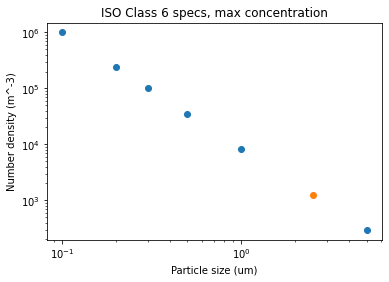

In [17]:
# N_ISO7_array = [352000,83200,2930]
# size_ISO7_array = [0.5,1.0,5.0]

# maximum concentration limits equal to and greater than 
# considered sizes in array of particle sizes
N_ISO6_array = [1e6,237000,102000,35200,8320,293]

# particle sizes
size_ISO6_array = [0.1,0.2,0.3,0.5,1.0,5.0]

# interpolate in log-log space
f = interpolate.interp1d(np.log10(size_ISO6_array), np.log10(N_ISO6_array), kind="linear")
xnew = [np.log10(2.5)]
ynew = f(xnew)   # use interpolation function returned by `interp1d`

# plot linear values, with log-log scaling
plt.scatter(size_ISO6_array,N_ISO6_array)
plt.scatter(np.power(10.,xnew),np.power(10.,ynew))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Particle size (um)")
plt.ylabel("Number density (m^-3)")

'''
# flipped axes
plt.scatter(N_ISO6_array,size_ISO6_array)
plt.scatter(np.power(10.,ynew),np.power(10.,xnew))
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Particle size (um)")
plt.xlabel("Number density (m^-3)")
'''

plt.title("ISO Class 6 specs, max concentration")

plt.show()

In [4]:
print("Max PM2.5 value (m^(-3)):", np.power(10.,ynew)[0])

Max PM2.5 value (m^(-3)): 1238.085923221107


<Figure size 432x288 with 0 Axes>

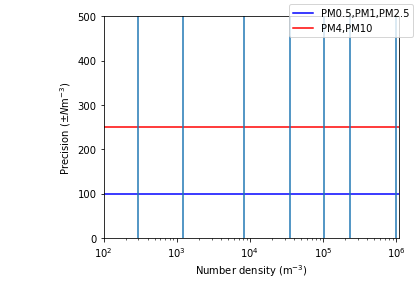

In [46]:
# plot precision

# abcissa
abcissa_densities = np.linspace(0,boundary_1to2) # (/m^3)

# step-like functions of precisions
ordinate_precisions_PM05to25 = np.zeros(len(abcissa_densities))
ordinate_precisions_PM05to25[abcissa_densities < boundary_0to1] = prec_PM05to25_low_numb
ordinate_precisions_PM05to25[abcissa_densities > boundary_0to1] = prec_PM05to25_high_frac*abcissa_densities[
                                                                        abcissa_densities > boundary_0to1]

ordinate_precisions_PM4to10 = np.zeros(len(abcissa_densities))
ordinate_precisions_PM4to10[abcissa_densities < boundary_0to1] = prec_PM4to10_low_numb
ordinate_precisions_PM4to10[abcissa_densities > boundary_0to1] = prec_PM4to10_high_frac*abcissa_densities[
                                                                        abcissa_densities > boundary_0to1]

plt.clf()

f, (ax1) = plt.subplots(1, 1)

ax1.plot(abcissa_densities,ordinate_precisions_PM05to25,color="blue",label="PM0.5,PM1,PM2.5")
ax1.plot(abcissa_densities,ordinate_precisions_PM4to10,color="red",label="PM4,PM10")
ax1.set_ylabel("Precision ($\pm N $m$^{-3}$)")
ax1.set_xlabel("Number density (m$^{-3}$)")

ax1.axvline(x=1e6)
ax1.axvline(x=237000)
ax1.axvline(x=102000)
ax1.axvline(x=35200)
ax1.axvline(x=8320)
ax1.axvline(x=1238)
ax1.axvline(x=293)
ax1.annotate('local max', xy=(3, 1),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax1.set_ylim([0,5e2])
ax1.set_xlim([1e2,1.1e6])

f.legend()

ax1.set_xscale('log')

plt.tight_layout()
plt.show()

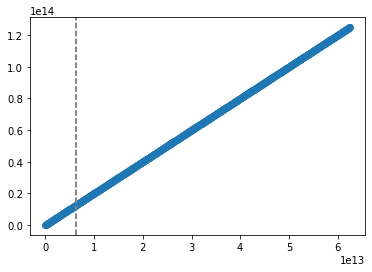

In [44]:
# plot accuracy and resolution

# convert to numbers, based on salt
abcissa_number_nacl = np.divide(abcissa_mass_range,m_nacl)
number_range_0to1 = np.divide(100,m_nacl)
number_range_1to2 = np.divide(100,m_nacl)

plt.scatter(abcissa_number_nacl,2*abcissa_number_nacl)
plt.axvline(number_range_0to1, linestyle="--", color="gray")
plt.axvline(number_range_1to2, linestyle="--", color="gray")



plt.show()